### Import Necessary Libraries

In [1]:

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

MNIST Class: This class is defined in a module that you've imported with from MNIST_Dataset_Loader.mnist_loader import MNIST. The class handles the task of loading and processing the MNIST dataset, which consists of handwritten digits commonly used for training and testing machine learning models.

In [2]:
# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/') 


Loading MNIST Data...


##### this load training function returns two array of images and labels

 each sublist in `images` with pixel values from `image_data`. Each image is a flattened array of pixel values (from 0 to 255), and each sublist represents one image.


In [3]:
# Load Training Data
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


In [4]:
# Load Testing Data
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [5]:
# Prepare Classifier Training and Validation Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_img, train_labels, test_size=0.1)


Preparing Classifier Training and Validation Data...




### KNeighborsClassifier Parameters:
- **`n_neighbors=5`**: Specifies the number of neighbors to use for kneighbors queries. In KNN, the algorithm predicts the class of a sample based on the majority class among its k nearest neighbors. Setting `n_neighbors` to 5 means the classifier considers the five nearest points in the feature space to determine the classification.
  
- **`algorithm='auto'`**: This parameter allows the algorithm to automatically decide the most appropriate algorithm to compute the nearest neighbors based on the training data. `scikit-learn` chooses from `‘ball_tree’`, `‘kd_tree’`, `‘brute’` (a brute-force search), and other optimized algorithms based on the fit data.

- **`n_jobs=10`**: Determines the number of parallel jobs to run for neighbor search. Setting `n_jobs` to 10 allows the classifier to use ten CPU cores for processing, which can speed up the computation of nearest neighbors if you have a multicore processor. Setting `n_jobs=-1` would use all available cores.


In [6]:
# Setup KNN Classifier
print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)


KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10


KNeighborsClassifier(n_jobs=10)

### Pickling Classifier for Future Use

In [7]:
print('\nPickling the Classifier for Future Use...')
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)


Pickling the Classifier for Future Use...


In [8]:
# Load Classifier from Pickle
# pickle_in = open('MNIST_KNN.pickle', 'rb')
# clf = pickle.load(pickle_in)

### Validate the Classifier

In [9]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)
print('\nKNN Trained Classifier Confidence: ', confidence)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)
print('\nPredicted Values: ', y_pred)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)


Calculating Accuracy of trained Classifier...

KNN Trained Classifier Confidence:  0.975

Making Predictions on Validation Data...

Predicted Values:  [0 6 9 ... 1 4 7]

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Image Data:  0.975



Creating Confusion Matrix...


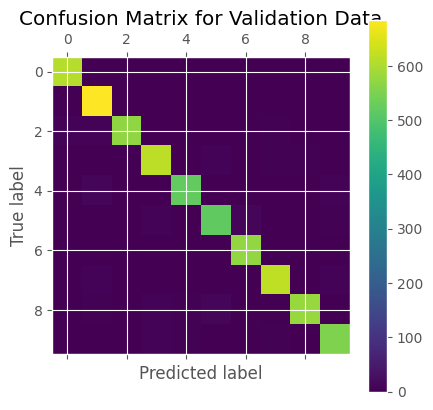

In [10]:
# Create Confusion Matrix
print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Test the Classifier


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9679

Creating Confusion Matrix for Test Data...


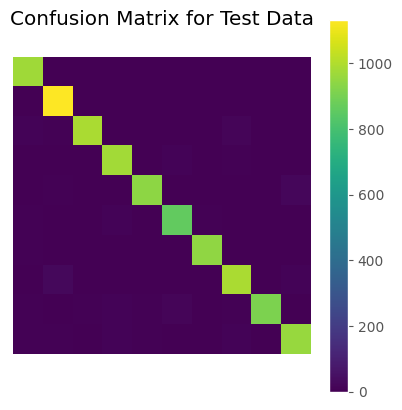

In [11]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

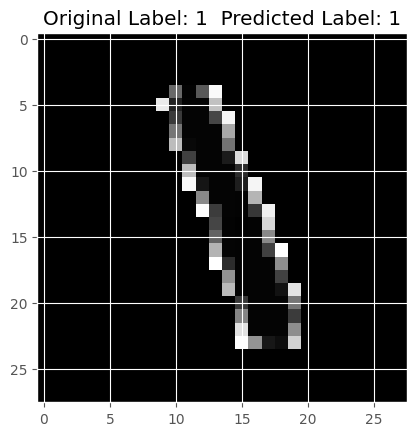

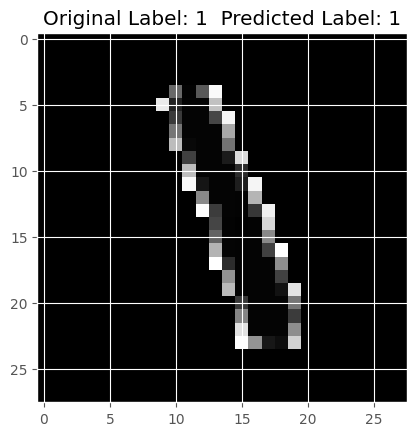

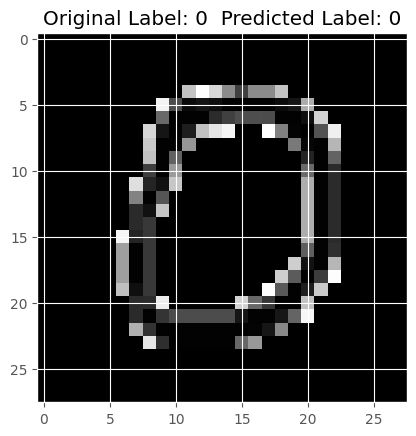

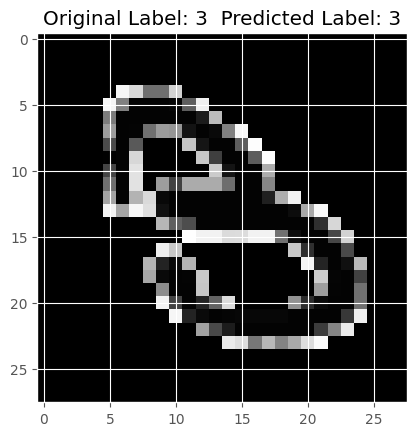

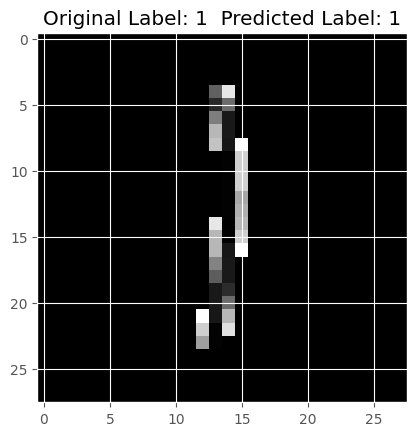

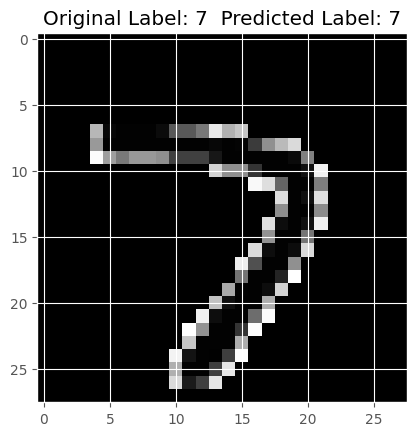

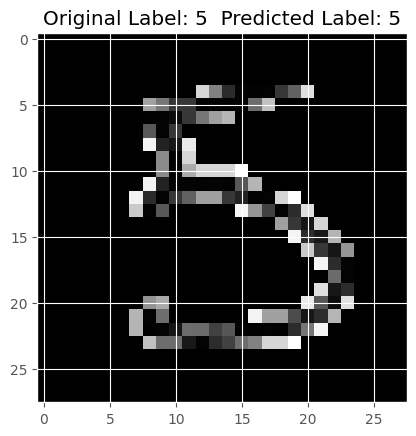

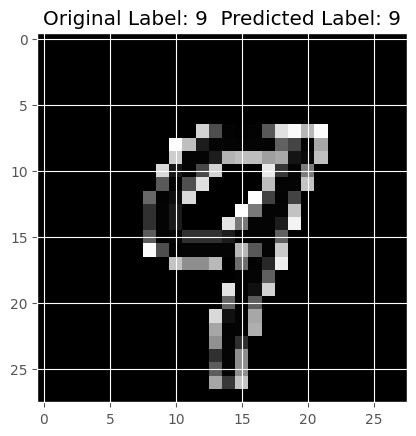

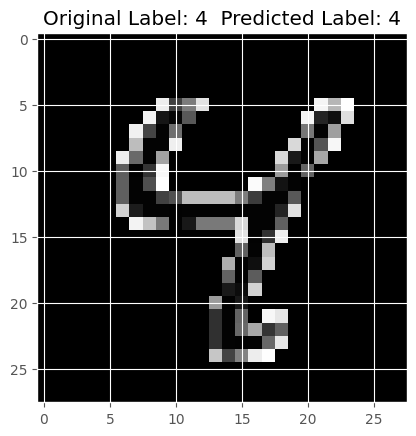

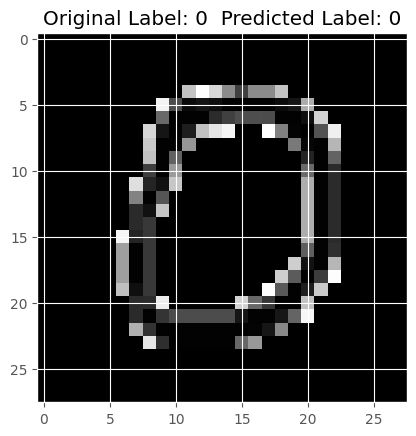

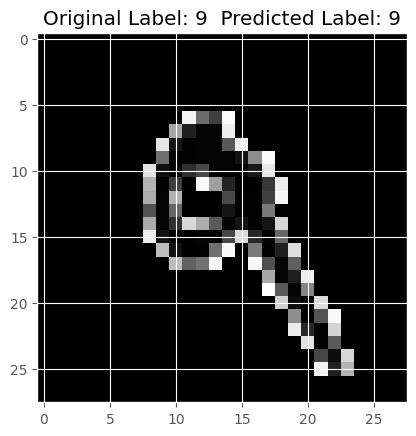

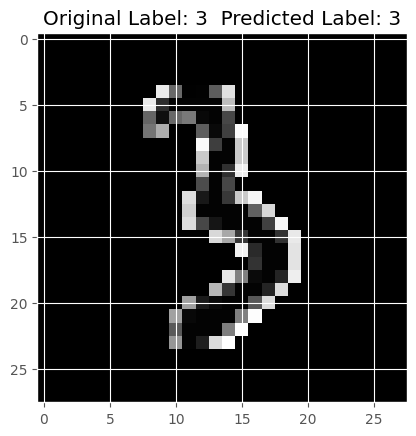

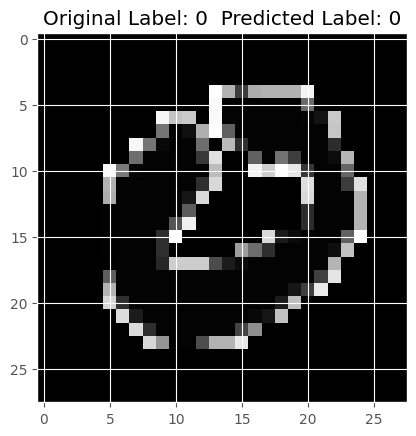

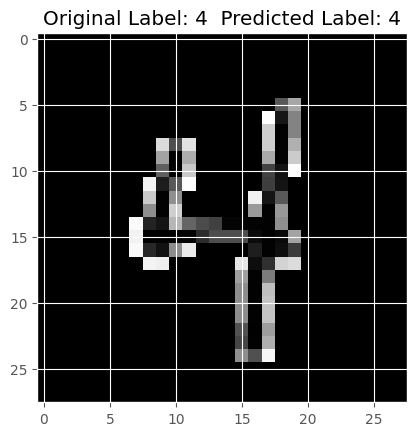

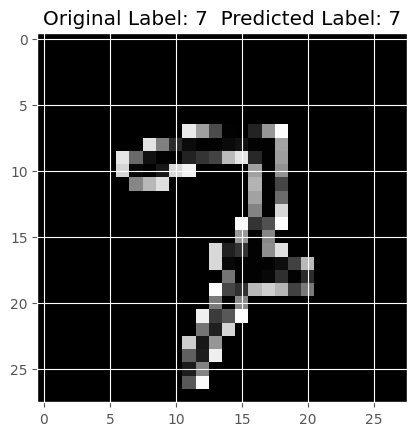

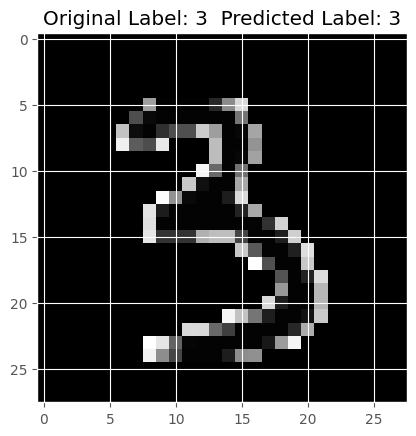

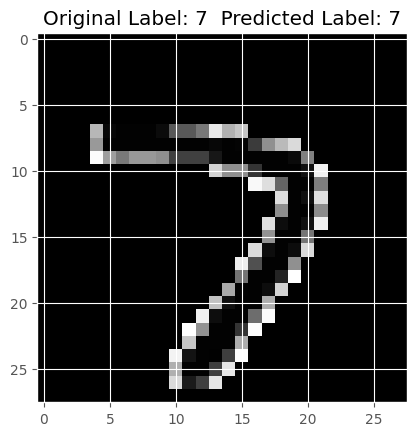

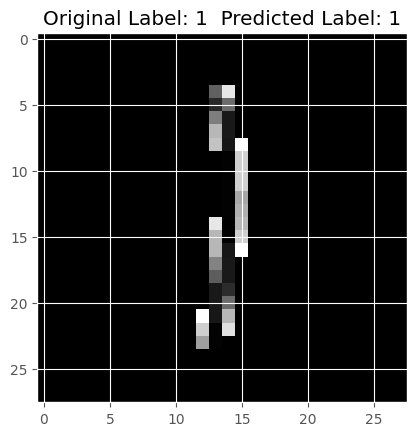

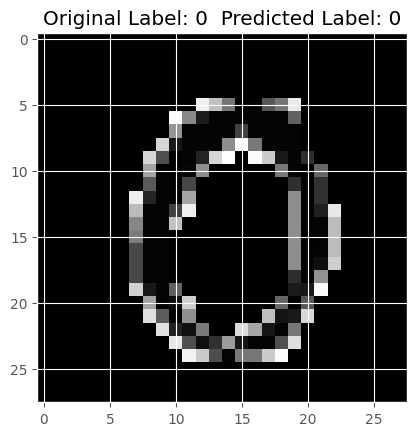

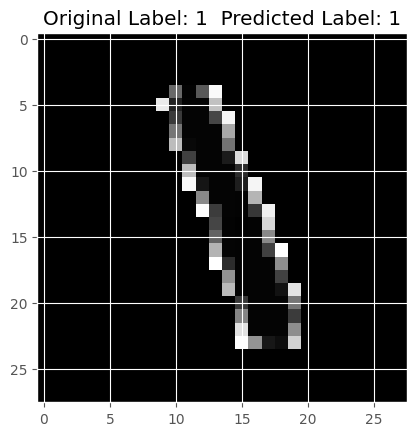

In [20]:
# Display Test Images with Predictions
a = np.random.randint(1, 50, 20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()